In [26]:
from lxml import etree, objectify 
import codecs
import networkx as nx

xml = codecs.open('map2.xml', "r", "utf-8").read()
utf8_parser = objectify.makeparser(encoding='utf-8')
root = objectify.fromstring(xml.encode('utf-8'), parser=utf8_parser)

G = nx.Graph()
ends = set()
for lul in root.getchildren():
    if lul.tag == 'way' and 'highway' in [child.attrib.get('k') for child in lul.getchildren() if child.tag == 'tag']:
        nds = [nd.attrib.get('ref') for nd in lul.getchildren() if nd.tag == 'nd']
        ends.add(nds[0])
        ends.add(nds[-1])
        for i in range(len(nds)-1):
            G.add_edge(nds[i], nds[i+1])
            
d = nx.to_dict_of_lists(G) # список смежности исходного графа
for node, adj_nodes in d.items():
    if len(adj_nodes) == 2 and node not in ends:
        G.remove_node(node)
        G.add_edge(adj_nodes[0], adj_nodes[1])
        d[adj_nodes[0]].remove(node)
        d[adj_nodes[0]].append(adj_nodes[1])
        d[adj_nodes[1]].remove(node)
        d[adj_nodes[1]].append(adj_nodes[0])

pos = {}
for node in root.getchildren():
    if node.tag == 'node' and node.attrib.get('id') in G.nodes:
        pos[node.attrib.get('id')] = [float(node.attrib.get('lat')), float(node.attrib.get('lon'))]

In [23]:
adj_list_dict = nx.to_dict_of_lists(G)
adj_list_str = ''
for k, v in adj_list_dict.items():
    adj_list_str += k + ',' + ','.join(v) + '\n'
with open('adjacency_list.csv', 'w') as file:
    file.write(adj_list_str)

In [18]:
list_str = ''
for k, v in pos.items():
    list_str += ','.join([k, str(v[0]), str(v[1])]) + '\n'
with open('coordinates.csv', 'w') as file:
    file.write(list_str)

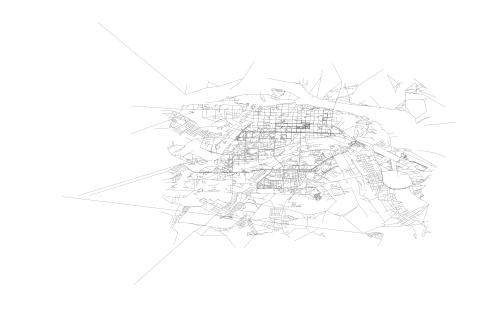

In [27]:
import matplotlib.pyplot as plt

options = {
    'node_color': 'black',
    'node_size': 0, 
    'width': 0.1,
    'pos': pos
}
nx.draw(G, **options)
plt.axis('off')
plt.savefig("graph_Kirov.png", dpi=3000)
#plt.savefig("graph_Kirov.pdf")